In [16]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Date/time processing
from datetime import datetime, timedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

# Forecasting
# from prophet import Prophet

# Machine learning (for optional regression/classification)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Clustering (optional)
from sklearn.cluster import KMeans

# Stats and warnings
# import statsmodels.api as sm
# import warnings
# warnings.filterwarnings("ignore")

In [17]:
# Importing the dataset
df = pd.read_csv("weatherHistory.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140,9.9820,0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139,9.9015,0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140,9.9015,0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140,9.9015,0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134,9.9015,0,1014.98,Mostly cloudy throughout the day.


In [18]:
# Preprocessing the Data
df.replace('?', np.nan, inplace=True)
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

print("\nUpdated DataFrame info:")
print(df.info())

Missing values per column:
 Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95936 entries, 0 to 95935
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 

In [19]:
# Keeping the data from the latest year only
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df = df[df['Formatted Date'].dt.year == 2016].copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8409 entries, 87527 to 95935
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            8409 non-null   datetime64[ns, UTC]
 1   Summary                   8409 non-null   object             
 2   Precip Type               8409 non-null   object             
 3   Temperature (C)           8409 non-null   float64            
 4   Apparent Temperature (C)  8409 non-null   float64            
 5   Humidity                  8409 non-null   float64            
 6   Wind Speed (km/h)         8409 non-null   float64            
 7   Wind Bearing (degrees)    8409 non-null   int64              
 8   Visibility (km)           8409 non-null   float64            
 9   Loud Cover                8409 non-null   int64              
 10  Pressure (millibars)      8409 non-null   float64            
 11  Daily Summary    

In [20]:
# Cleaning the data on anomaly values
df = df[df['Temperature (C)'].between(-50, 50)]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8409 entries, 87527 to 95935
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            8409 non-null   datetime64[ns, UTC]
 1   Summary                   8409 non-null   object             
 2   Precip Type               8409 non-null   object             
 3   Temperature (C)           8409 non-null   float64            
 4   Apparent Temperature (C)  8409 non-null   float64            
 5   Humidity                  8409 non-null   float64            
 6   Wind Speed (km/h)         8409 non-null   float64            
 7   Wind Bearing (degrees)    8409 non-null   int64              
 8   Visibility (km)           8409 non-null   float64            
 9   Loud Cover                8409 non-null   int64              
 10  Pressure (millibars)      8409 non-null   float64            
 11  Daily Summary    

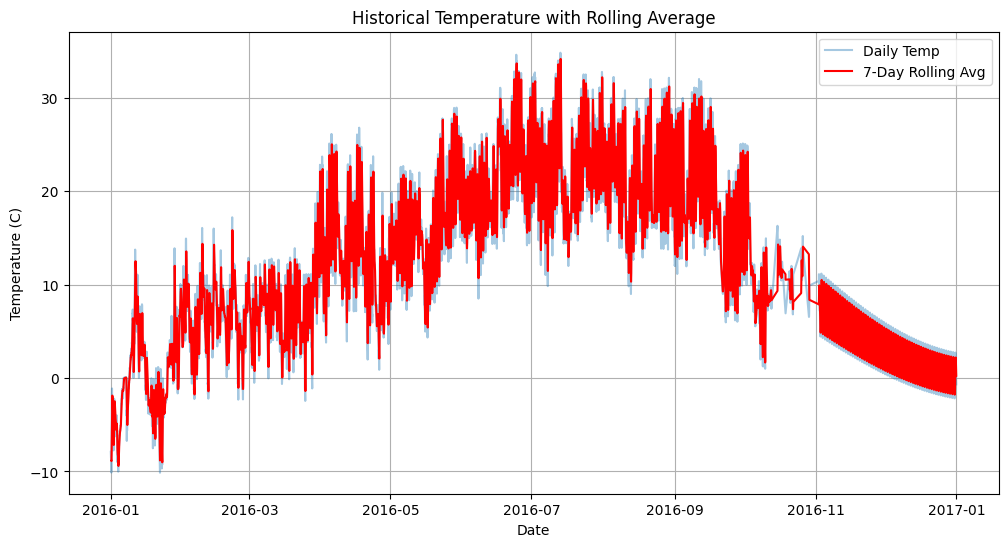

In [21]:
# Rolling Average Visualization
import matplotlib.pyplot as plt

df.set_index('Formatted Date', inplace=True)
df['Rolling Mean'] = df['Temperature (C)'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Temperature (C)'], label='Daily Temp', alpha=0.4)
plt.plot(df['Rolling Mean'], label='7-Day Rolling Avg', color='red')
plt.legend()
plt.title("Historical Temperature with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.grid(True)
plt.show()
